In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/sample/10章

/content/drive/MyDrive/sample/10章


# 10章 アンケート分析を行うための言語処理１０本ノック

ここでは、まちづくりのアンケートを使って分析していきます。  
主に言語処理を取り扱っていきます。
言語処理特有の処理や、データの持たせ方を学びましょう。

### ノック91：データを読み込んで把握しよう

In [ ]:
import pandas as pd
survey = pd.read_csv("survey.csv")
print(len(survey))
survey.head()

86


datetime            comment  satisfaction
0  2019/3/11  駅前に若者が集まっている(AA駅)             1
1  2019/2/25   スポーツできる場所があるのが良い             5
2  2019/2/18          子育て支援が嬉しい             5
3   2019/4/9    保育園に入れる（待機児童なし）             4
4   2019/1/6          駅前商店街が寂しい             2

In [ ]:
survey.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [ ]:
survey = survey.dropna()
survey.isna().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

### ノック92：不要な文字を除外してみよう

In [ ]:
survey["comment"] = survey["comment"].str.replace("AA", "")
survey.head()

datetime           comment  satisfaction
0  2019/3/11   駅前に若者が集まっている(駅)             1
1  2019/2/25  スポーツできる場所があるのが良い             5
2  2019/2/18         子育て支援が嬉しい             5
3   2019/4/9   保育園に入れる（待機児童なし）             4
4   2019/1/6         駅前商店街が寂しい             2

In [ ]:
survey["comment"] = survey["comment"].str.replace("\(.+?\)", "", regex=True)
survey.head()
#「正規表現」とは、文字列の抽出や操作をするための表現・記述方法
# \( と \)：丸括弧そのものを意味します。 ( や ) は正規表現の特殊記号なので、バックスラッシュ \ でエスケープ
# 正規表現では、特殊文字を文字として認識させたい時、バックスラッシュ（\）を使ってエスケープ（迂回）を行う

datetime           comment  satisfaction
0  2019/3/11      駅前に若者が集まっている             1
1  2019/2/25  スポーツできる場所があるのが良い             5
2  2019/2/18         子育て支援が嬉しい             5
3   2019/4/9   保育園に入れる（待機児童なし）             4
4   2019/1/6         駅前商店街が寂しい             2

In [ ]:
survey["comment"] = survey["comment"].str.replace("\（.+?\）", "", regex=True)
survey.head()

datetime           comment  satisfaction
0  2019/3/11      駅前に若者が集まっている             1
1  2019/2/25  スポーツできる場所があるのが良い             5
2  2019/2/18         子育て支援が嬉しい             5
3   2019/4/9           保育園に入れる             4
4   2019/1/6         駅前商店街が寂しい             2

### ノック93：文字数をカウントしてヒストグラムを表示してみよう

In [ ]:
survey["length"] = survey["comment"].str.len()
survey.head()

datetime           comment  satisfaction  length
0  2019/3/11      駅前に若者が集まっている             1      12
1  2019/2/25  スポーツできる場所があるのが良い             5      16
2  2019/2/18         子育て支援が嬉しい             5       9
3   2019/4/9   保育園に入れる（待機児童なし）             4      15
4   2019/1/6         駅前商店街が寂しい             2       9

(array([10., 24., 22., 10.,  6.,  6.,  5.,  0.,  0.,  1.]),
 array([ 4. ,  8.6, 13.2, 17.8, 22.4, 27. , 31.6, 36.2, 40.8, 45.4, 50. ]),
 <BarContainer object of 10 artists>)

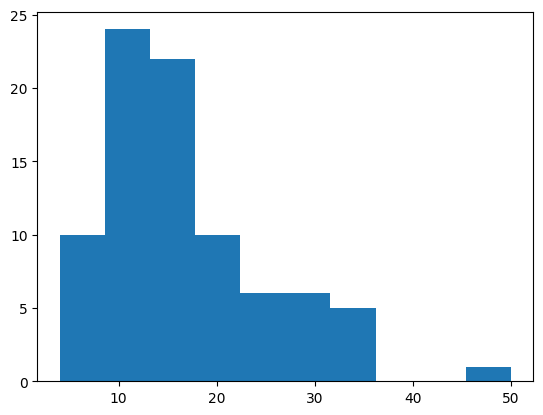

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline # Jupyter Notebook や Google Colab などで、グラフをノート内に表示するためのマジックコマンド。 ※ 普通の Python スクリプトでは不要
plt.hist(survey["length"])

### ノック94：形態素解析で文章を分割してみよう

・「**形態素解析**」とは、私たちが普段生活の中で一般的に使っている言葉、つまり「自然言語」を**形態素**にまで分割する技術のことです。\
※「**形態素**」とは、言葉が意味を持つまとまりの単語の最小単位のこと

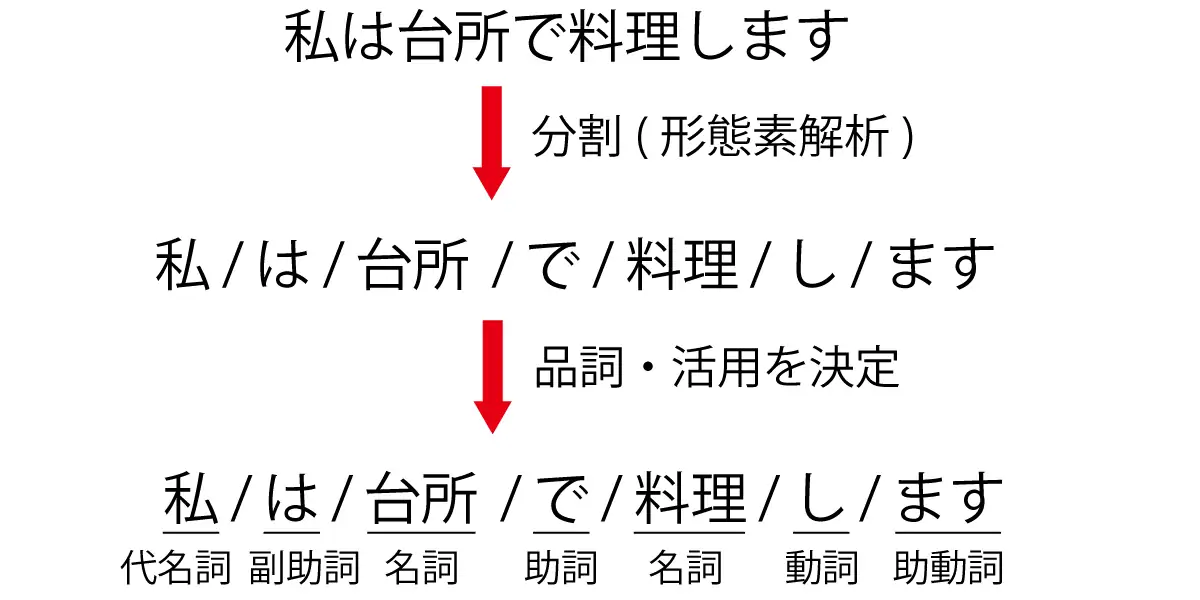
https://udemy.benesse.co.jp/data-science/ai/morphological-analysis.html


・この**形態素解析**という技術は、インターネットの検索エンジンなどにも使用されている

・**MeCab**とは、日本語の形態素解析が可能な解析エンジンのことで、文章を日本語の文法ルールに基づいて単語に分割したり、各単語の品詞情報を出力したりなど、あらゆる形態素解析を自動で行える\
・**MeCab**では、登録されている「**辞書**」に基づいて文章を単語へ**分かち書き**を行う\
※「**辞書**」とは、単語の品詞情報をまとめたもの\
※「**分かち書き**」とは、文章の単語間に空白文字を挿入する処理のこと\
→例えば「かつおたたき」は、「かつ　お　たたき」みたいな感じ

In [ ]:
!pip install mecab-python3 unidic-lite
# Python で MeCab を使うためのパッケージと、簡易的な日本語辞書（unidic-lite）をインストール

In [ ]:
import MeCab
tagger = MeCab.Tagger() # mecabのTaggerメソッドを呼び出す。文章の解析器（Tagger）を作る
text = "すもももももももものうち"
words = tagger.parse(text) # 文章をMeCabで形態素解析し、その解析結果を文字列として取得
words

'すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nの\tノ\tノ\tの\t助詞-格助詞\t\t\t\nうち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0\nEOS\n'

In [ ]:
words = tagger.parse(text).splitlines() # MeCab によって解析された各行をリストに分割（改行\nごと）
words_arr = []
for i in words:
    if i == 'EOS': continue # 最後に含まれる "EOS"（End Of Sentence）を除外する処理。　　　continue→スキップする。EOS：MeCabの解析結果の終了を示すマーカー。
    word_tmp = i.split()[0] # 形態素解析結果の1行から「表層形（単語）」だけを取り出す。　　　　split()はデフォルトでは空白・タブ(\t)などで分割
    words_arr.append(word_tmp) # 1行ずつ処理し、先頭の単語（＝表層形）だけを取り出して words_arr に追加
words_arr

['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']

In [ ]:
words = tagger.parse(text).splitlines()
words

['すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0',
 'も\tモ\tモ\tも\t助詞-係助詞\t\t\t',
 'もも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0',
 'も\tモ\tモ\tも\t助詞-係助詞\t\t\t',
 'もも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0',
 'の\tノ\tノ\tの\t助詞-格助詞\t\t\t',
 'うち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0',
 'EOS']

In [46]:
# # 形態素分析ライブラリーMeCab と 辞書(mecab-ipadic-NEologd)のインストール
# !apt-get install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
# !apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl xz-utils make python-mecab > /dev/null
# !git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null
# !echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
# !pip install mecab-python3 > /dev/null

# # シンボリックリンクによるエラー回避
# !ln -s /etc/mecabrc /usr/local/etc/mecabrc

In [47]:
# # MeCabのインポート
# import MeCab

# # 辞書が格納されているpathを格納
# path = "-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd"

# # 解析する文章を格納
# text = "すもももももももものうち"

# # MeCabのTaggerメソッドを呼び出す
# # 辞書指定
# tagger = MeCab.Tagger("path")

# # MeCabによる形態素解析の結果を表示
# words = tagger.parse(text)
# words

In [ ]:
# !pip install janome

In [ ]:
# from janome.tokenizer import Tokenizer

# t = Tokenizer()

# s = "吾輩は猫である"

# for token in t.tokenize(s):
#     print(token)

### ノック95：形態素解析で文章から「動詞・名詞」を抽出してみよう

In [48]:
text = "すもももももももものうち"
words = tagger.parse(text).splitlines() # MeCab で解析し、1行ずつのリストに分解
words_arr = []
parts = ["名詞", "動詞"] # 抽出したい品詞の種類（ここでは「名詞」と「動詞」）
for i in words:
    if i == 'EOS' or i == '': continue # EOS（文の終わり）や空行をスキップ
    word_tmp = i.split()[0] # 表層形（単語そのもの）を抽出
    part = i.split()[4].split("-")[0] # i.split()[4]：MeCabの解析結果から 品詞情報 を含む要素を取り出す。
                                      # .split("-")[0]：その品詞情報を「-（ハイフン）」で分割して、最も上位の品詞（名詞・動詞など）を取得する。
    if not (part in parts):continue # 指定した品詞（名詞・動詞）でなければスキップ。
    words_arr.append(word_tmp) # 該当する場合はリスト words_arr に追加
words_arr
# この形式は unidic 辞書 を使用している場合

['すもも', 'もも', 'もも', 'うち']

### ノック96：形態素解析で抽出した頻出する名詞を確認してみよう

In [ ]:
all_words = []
parts = ["名詞"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

['駅前', '若者', 'スポーツ', '場所', 'の', '子育て', '支援', '保育園', '駅前', '商店', '街', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '小学校', '綺麗', '公園', '近く', '公園', 'スーパー', 'の', '大変', '子育て', 'デートスポット', '商店', '街', '夜道', 'ゴミ', '処理', '楽', '映画', '館', '街路', '樹', '公園', '追加', '観光', 'スポット', '子育て', '道', '綺麗', '都内', 'アクセス', '家賃', 'リーズナブル', 'BBB', '渋滞', '商店', '街', '屋根', '雨', '大変', '商店', '街', 'たくさん', '喫茶店', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転車', 'ランニング', '運動', '場所', '有名', '企業', '駅前', '駐車', '場', '変', 'おじさん', '声', '事', '警察', '巡回', '強化', '消防', '団', '活発', '安心', '災害', '時', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', 'よう', '氾濫', '防止', '説明', '信号', '交差点', 'ｘｘｘ', '事故', 'そう', '信号', '商店', '街', '活性', '化', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪場', '不便', '街路', '樹', '落ち葉', '掃除', '大変', '街路', '樹', '災害', '時', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治体', '支援', '自治体', '活動', '頻繁', '安心', '観光', '地', '最近', '県', 'ナンバー', '車', '防犯', 'の', '駐車', '場', '数', '料金', '駅前', '公共', '駐車', '場

In [ ]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count",ascending=False).head()

count
words       
駅前         7
場所         6
街          6
の          5
公園         5

### ノック97：関係のない単語を除去しよう

In [ ]:
stop_words = ["の"]
all_words = []
parts = ["名詞"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        if word_tmp in stop_words:continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

['駅前', '若者', 'スポーツ', '場所', '子育て', '支援', '保育園', '駅前', '商店', '街', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '小学校', '綺麗', '公園', '近く', '公園', 'スーパー', '大変', '子育て', 'デートスポット', '商店', '街', '夜道', 'ゴミ', '処理', '楽', '映画', '館', '街路', '樹', '公園', '追加', '観光', 'スポット', '子育て', '道', '綺麗', '都内', 'アクセス', '家賃', 'リーズナブル', 'BBB', '渋滞', '商店', '街', '屋根', '雨', '大変', '商店', '街', 'たくさん', '喫茶店', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転車', 'ランニング', '運動', '場所', '有名', '企業', '駅前', '駐車', '場', '変', 'おじさん', '声', '事', '警察', '巡回', '強化', '消防', '団', '活発', '安心', '災害', '時', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', 'よう', '氾濫', '防止', '説明', '信号', '交差点', 'ｘｘｘ', '事故', 'そう', '信号', '商店', '街', '活性', '化', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪場', '不便', '街路', '樹', '落ち葉', '掃除', '大変', '街路', '樹', '災害', '時', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治体', '支援', '自治体', '活動', '頻繁', '安心', '観光', '地', '最近', '県', 'ナンバー', '車', '防犯', '駐車', '場', '数', '料金', '駅前', '公共', '駐車', '場', '歩行', '者', '

In [ ]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count",ascending=False).head()

count
words       
駅前         7
場所         6
街          6
公園         5
商店         5

### ノック98：顧客満足度と頻出単語の関係をみてみよう

In [ ]:
stop_words = ["の"]
parts = ["名詞"]
all_words = []
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        if word_tmp in stop_words:continue
        words_arr.append(word_tmp)
        satisfaction.append(survey["satisfaction"].iloc[n])
    all_words.extend(words_arr)
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()

words  satisfaction  count
0    駅前             1      1
1    若者             1      1
2  スポーツ             5      1
3    場所             5      1
4   子育て             5      1

In [ ]:
words_satisfaction = all_words_df.groupby("words").mean()["satisfaction"]
words_count = all_words_df.groupby("words").sum()["count"]
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head()

satisfaction  count
words                     
BBB             2.0      1
^^              5.0      1
おじさん            1.0      1
ごみ              2.0      1
そう              1.0      1

In [ ]:
words_df = words_df.loc[words_df["count"]>=3]
words_df.sort_values("satisfaction", ascending=False).head()

satisfaction  count
words                     
子育て        4.333333      3
綺麗         4.333333      3
安心         4.333333      3
スポーツ       3.666667      3
道          3.000000      3

In [ ]:
words_df.sort_values("satisfaction").head()

satisfaction  count
words                     
駐車         1.000000      4
場          1.000000      4
信号         1.333333      3
大変         1.333333      3
駅前         1.428571      7

### ノック99：アンケート毎の特徴を表現してみよう

In [ ]:
parts = ["名詞"]
all_words_df = pd.DataFrame()
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_df = pd.DataFrame()
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        words_df[word_tmp] = [1]
    all_words_df = pd.concat([all_words_df, words_df] ,ignore_index=True)
all_words_df.head()

BBB  ^^  おじさん  ごみ  そう  たくさん  づくり  とき    の  まち  ...   雨  電話  頻繁   館   駅前  \
0  NaN NaN   NaN NaN NaN   NaN  NaN NaN  NaN NaN  ... NaN NaN NaN NaN  1.0   
1  NaN NaN   NaN NaN NaN   NaN  NaN NaN  1.0 NaN  ... NaN NaN NaN NaN  NaN   
2  NaN NaN   NaN NaN NaN   NaN  NaN NaN  NaN NaN  ... NaN NaN NaN NaN  NaN   
3  NaN NaN   NaN NaN NaN   NaN  NaN NaN  NaN NaN  ... NaN NaN NaN NaN  NaN   
4  NaN NaN   NaN NaN NaN   NaN  NaN NaN  NaN NaN  ... NaN NaN NaN NaN  1.0   

   駐車  駐輪場  高速  高齢  ｘｘｘ  
0 NaN  NaN NaN NaN  NaN  
1 NaN  NaN NaN NaN  NaN  
2 NaN  NaN NaN NaN  NaN  
3 NaN  NaN NaN NaN  NaN  
4 NaN  NaN NaN NaN  NaN  

[5 rows x 184 columns]

In [ ]:
all_words_df = all_words_df.fillna(0)
all_words_df.head()

BBB   ^^  おじさん   ごみ   そう  たくさん  づくり   とき    の   まち  ...    雨   電話   頻繁  \
0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     館   駅前   駐車  駐輪場   高速   高齢  ｘｘｘ  
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 184 columns]

### ノック100：類似アンケートを探してみよう

In [ ]:
print(survey["comment"].iloc[2])
target_text = all_words_df.iloc[2]
print(target_text)

子育て支援が嬉しい
BBB     0.0
^^      0.0
おじさん    0.0
ごみ      0.0
そう      0.0
       ... 
駐車      0.0
駐輪場     0.0
高速      0.0
高齢      0.0
ｘｘｘ     0.0
Name: 2, Length: 184, dtype: float64


In [ ]:
import numpy as np
cos_sim = []
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text) * np.linalg.norm(cos_text))
    cos_sim.append(cos)
all_words_df["cos_sim"] = cos_sim
all_words_df.sort_values("cos_sim",ascending=False).head()

BBB   ^^  おじさん   ごみ   そう  たくさん  づくり   とき    の   まち  ...   電話   頻繁    館  \
2   0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
24  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
33  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
50  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     駅前   駐車  駐輪場   高速   高齢  ｘｘｘ   cos_sim  
2   0.0  0.0  0.0  0.0  0.0  0.0  1.000000  
24  0.0  0.0  0.0  0.0  0.0  0.0  0.707107  
15  0.0  0.0  0.0  0.0  0.0  0.0  0.707107  
33  0.0  0.0  0.0  0.0  0.0  0.0  0.500000  
50  0.0  0.0  0.0  0.0  0.0  0.0  0.408248  

[5 rows x 185 columns]

In [ ]:
print(survey["comment"].iloc[2])
print(survey["comment"].iloc[24])
print(survey["comment"].iloc[15])
print(survey["comment"].iloc[33])

子育て支援が嬉しい
子育てがしやすい
子育てしやすい
働くママの支援をもっと増やして欲しい
